**Сборный проект № 1 - Оценка факторов успешности компьютерных игр**

**Цель проекта:** выявить факторы, которые определяют успешность компьютерной игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

**Основные задачи работы:**

1. Загрузить файл с данными и изучить информацию
2. Осуществить предобработку имеющихся сведений
3. Проанализировать данные
4. Составить портрет пользователя по регионам
5. Осуществить проверку статистических гипотез
6. Сформулировать выводы по полученным сведениям

**Содержание:**

1. Первичное изучение имеющихся данных
2. Предобработка данных
3. Исследовательский анализ данных
4. Составление портрета пользователей разных регионов
5. Проверка статистических гипотез
6. Общий вывод по проекту

# Загрузка и первичное изучение имеющихся данных

## Загрузка необходимых библиотек и датасета

In [1]:
# Как и всегда, первым делом подгружаем необходимые для работы библиотеки

import pandas as pd
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore')
from scipy.stats import ks_2samp

In [2]:
# Загружаем имеющийся датасет с использованием конструкции try-except

# для работы в тренажере
try:
    data = pd.read_csv('/datasets/games.csv')
    print('Загружен файл для работы в тренажере')
except:
    data = pd.read_csv('games.csv')
    print('Загружен файл для локальной работы')


Загружен файл для локальной работы


In [3]:
# Вызываем таблицу для визуального осмотра

data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Изучение состава данных

In [4]:
# Для оценки состава датасета применяем метод info()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [5]:
# Для оценки столбцов с числовыми значениями применим метод describe()

data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


In [6]:
# Исследуем пропуски в столбце Name

data[data['Name'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [7]:
# Исследуем пропуски в столбце Year_of_Release

data[data['Year_of_Release'].isna()].head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [8]:
# Исследуем пропуски в столбце Genre

data[data['Genre'].isna()]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
# Проверим, какие столбцы не имеюи данных о продажах по всем регионам 

data[(data['NA_sales'] == 0) & (data['JP_sales'] == 0) & (data['EU_sales'] == 0) & (data['Other_sales'] == 0)]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16676,G1 Jockey 4 2008,PS3,2008.0,Sports,0.0,0.0,0.0,0.0,NaN,NaN,NaN
16709,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,0.0,0.0,0.0,0.0,NaN,NaN,NaN


## Выводы по первичному изучению данных

Датафрейм состоит из 16715 строк и 11 столбцов. 
    
Сразу бросается в глаза то, что названия столбцов не соответствуют нормам. Необходимо применить к ним метод lower() для перевода всех букв в строчный вид. 

Подробнее о каждом столбце можно сказать следующее:

1. Name — название игры:
- в наличии 2 пропуска. Скорее всего, причиной их появления стала ошибка при записи или переносе данных. При этом строки с пропуском в данном столбце не заполнены и в других параметрах. Считаю необходимым избавиться от этих строк, так как они не информативны;
- формат данных object корректировки не требует.
2. Platform - игровая платформа, на которой выпущена игра: 
- пропусков не имеется. 
- формат данных object коррекции не требует.
3. Year_of_Release — год выпуска игры:
- имеются пропуски в количестве 269 (0,016%) шт. Они могли образоваться из-за ошибки при формировании таблицы, при переносе или сохранении данных. Количество пропусков не является критическим, можно оставить как есть. При этом изучение строк с пропусками в данном столбце показало, что в названиях игр могут встречаться годы их издания. Таким образом, есть возможность восстановить часть данных о годах выпуска путем "вытаскивания" этих сведений из названий;
- формат данных float64 было бы неплохо заменить на int, но наличие пропусков этого сделать пока не позволит.
4. Genre — жанр игры; 
- 2 пропуска, которые размещены в тех же строках, что и пробелы в названиях игр. Проблема будет решена удалением этих строк;
- формат данных object коррекции не требует.
5. NA_sales — продажи в Северной Америке (миллионы проданных копий): 
- пропусков нет;
- присутствуют нулевые значения. Их появление может быть обосновано тем, что данные игры не нашли популярности в Северной Америке. Более подробное изучение показало, что только 2 позиции не пользовались спросом во всех регионах, а остальные были распространены либо только в Японии, либо в Европе. Видимо, тематика игры имеет сильное влияние на ареал ее распространения. Данные нули заполнять не нужно, но следует помнить об их наличии;
- формат данных float64 не требует коррекции.
6. EU_sales — продажи в Европе (миллионы проданных копий):
- пропусков нет; 
- имеются нулевые значения. Объяснение им то же, что и в столбце Na_sales. Обрабатывать не нужно, но помнить будем.
- фрмат данных float не требует коррекции.
7. JP_sales — продажи в Японии (миллионы проданных копий); 
- пропусков нет;
- есть нулевые значения - то же самое, что и в предыдущих двух столбцах. Обрабатывать не будем;
- формат данных float не требует коррекции. 
8. Other_sales — продажи в других странах (миллионы проданных копий):
- пропусков нет;
- имеются нули, но объяснение даем то же, что и ранее. Обрабатывать не нужно. Формат данных float не требует коррекции.
**Изучение столбцов с продажами по регионам позволило выявить 2 строки, которые в себе не несут практически никакой информации. От них можно будет бескомпромиссно избавиться**

9. Critic_Score — оценка критиков (максимум 100):
- 8578 (51,3%) пропусков. Появление пробелов в данной ситуации может быть обосновано несколькими причинами: слишком ранний год выпуска, когда рецензии критиков публиковались только в специализированных журналах и найти их для учета не представлявляется возможным; масштаб игры не значителен, а потому критики обошли стороной эту игру; банальная ошибка в записи данных; оценка игры только местными критиками (например, в Японии и на японском языке, что не позволило найти данный рейтинг при сборе информации). Обработать пропуски не представляется возможным ввиду отсутствия данных - будем работать с тем, что есть.
- в столбце присутствуют нули. Думаю, это объясняется теми же причинами, но при заполнении таблицы произошел сбой и был записан ноль вместо пропуска. Для приведения данных к единому ранжиру можно заполнить пропуски нулями, а анализ данных проводить имея в виду их наличие;
- формат данных float64 требует перевода в int.
10. User_Score — оценка пользователей (максимум 10):
- 6701 пропуск в данных. Их наличие можно объяснить теми же причинами, что и про отзывы критиков в отношении года выпуска. В остальном возможно, что данные игры имеют специфический характер, поэтому рейтинги для них не попадают на известные площадки, откуда брались данные для таблицы. Можно заполнить пропуски нулями, чтобы было единообразие с предыдущим столбцом; 
- в столбце присутствуют 2424 значения tbd (To be determined -  будет определено). Чтобы эти записи не мешали обработке данных, заполним их нулями;
- формат данных object требует перевода в тип float64. 
11. Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию (E - от 6 лет, E10+ - от 10 лет, М - взрослые, Т - то 13 до 29 лет):
- 6766 пропусков. Их наличие объясняется тем, что организация была создана в 1994 году, в связи с чем более ранние игры не получили данной оценки, а также тем, что этот рейтинг относится к США и Канаде, а другие регионы пользуются своими аналогами ESRB. Пропуски оставляем как есть;
- формат данных object не требует коррекции.

## Вывод по разделу

В данном разделе был подготовлен необходимый инструментарий для проведения анализа данных. Вызваны необходимые библиотеки, функции из которых будут использованы далее в расчетах. Загружен датасет. Проведен первичный анализ имеющихся данных для получения представлении об их качественном составе, наличии ошибок и пропусков, высказаны предложения по последующей работе по подготовке этих сведений к анализу.

# Предобработка данных

## Форматирование названий столбцов

In [10]:
# Перепишем названия столбцов так, чтобы там использовались только строчные буквы. 
# Для этого напишем функцию

def list_to_lower(columns):
    
    new_columns = []

    for col in data.columns:
        new_columns.append(col.lower())

    return new_columns    

In [11]:
# Применяем сформированную функцию к списку столбцов

data.columns = list_to_lower(data.columns)

In [12]:
# Проверяем результат на датасете

data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


## Удаление неинформативных строк

In [13]:
# Удалим "лишние" строки (ориентируемся на строки с пропусками в столбце Name)

data = data.drop(data[data['name'].isna()].index)

In [14]:
# Удалим обнаруженные ранее строки с пропусками в продажах по всем регионам

data = data.drop(data[(data['na_sales'] == 0) &
                      (data['jp_sales'] == 0) &
                      (data['eu_sales'] == 0) &
                      (data['other_sales'] == 0)].index)

In [15]:
# Сбрасываем нумерацию индексов в датафрейме

data = data.reset_index()

In [16]:
# Проверяем состав датасета

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16711 entries, 0 to 16710
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16711 non-null  int64  
 1   name             16711 non-null  object 
 2   platform         16711 non-null  object 
 3   year_of_release  16442 non-null  float64
 4   genre            16711 non-null  object 
 5   na_sales         16711 non-null  float64
 6   eu_sales         16711 non-null  float64
 7   jp_sales         16711 non-null  float64
 8   other_sales      16711 non-null  float64
 9   critic_score     8137 non-null   float64
 10  user_score       10014 non-null  object 
 11  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


## Заполнение некоторых пропусков в годах выпуска игр

In [17]:
# Найдем самый ранний год выпуска игры

data['year_of_release'].min()

1980.0

In [18]:
# Создадим список лет с 1980 г. по 2016 г.

period = range(1980, 2016)

In [19]:
# Сформируем цикл, который разобьет названия игр построчно на слова, вытащит из этих элементов последний и,
# если тот будет числом из сформированного ряда лет, заменит пропуск в столбце year_of_release на полученное значение

for i in data[data['year_of_release'].isna()]['name'].index:
    year = data[data['year_of_release'].isna()]['name'][i].split()[-1]

    try:
        if int(year) in period:
             data.loc[i, 'year_of_release'] = int(year)

    except:
        None

In [20]:
# Проверяем количество пропусков в столбце (было 269 пропусков)

data['year_of_release'].isna().sum()

254

## Замена значений tbd в столбце user_score нулями

In [21]:
# Для поиска и аннигиляции значений tbd наймем функцию-киллера

def remove_tbd(row):
    
    score = row['user_score'] 
    
    if score  == 'tbd':
        return 0
    
    else:
        return score

In [22]:
# Даем наемнику добро на выполнение его гразной работы

data['user_score'] = data.apply(remove_tbd, axis = 1) 

In [23]:
# Требуем фотографию с доказательствами отсутствия клиента

data[data['user_score'] == 'tbd']

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [24]:
# Заметаем следы, переписав формат данных столбца на float64

data['user_score'] = data['user_score'].astype('float')

In [25]:
# Проверяем формат данных

data['user_score'].dtypes

dtype('float64')

## Заполнение нулями пропуски в столбцах user_score и critics_score

In [26]:
### Заполнение нулями пропуски в столбце user_score

data['user_score'].fillna(0, inplace = True)

In [27]:
# Проверяем результат (должно быть равно 16711)

data['user_score'].isna().value_counts()

False    16711
Name: user_score, dtype: int64

In [28]:
### Заполнение нулями пропуски в столбце critics_score

data['critic_score'].fillna(0, inplace = True)

In [29]:
# Проверяем результат (должно быть равно 16711)

data['critic_score'].isna().value_counts()

False    16711
Name: critic_score, dtype: int64

## Расчет суммарных продаж во всех регионах

In [30]:
# Создадим новый столбец, содержащий сведения о продажах игры во всех областях

data['sales_sum'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

In [31]:
# Проверяем результаты наших стараний

data.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,0.0,0.0,NaN,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,NaN,31.38


## Выводы по разделу

На данном этапе была осуществлена предобработка данных, которая в дальнейшем позволит проводить полноценный анализ на их основе:

1. названия столбцов переведены в нижний регистр;
2. удалены неинформативные строки;
3. заполнена часть пропусков в годах выпуска игр значениями из названия;
4. значения tbd в столбце user_score переписаны на нули;
5. пропуски в столбцах user_score и critics_score заменены нулями
6. создан новый столбец, содержащий суммарное количество продаж по регионам.

# Исследовательский анализ данных

## Оценка показателей игростроя за все годы

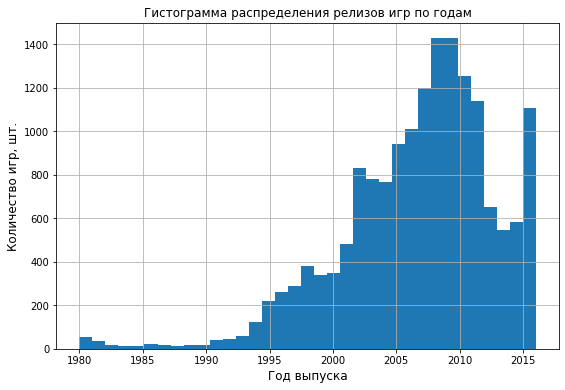

In [32]:
# Оценим показатели игростроения за все годы. 
# Для этого построим гистограмму по cnолбцу year_of_release

data['year_of_release'].hist(bins = 35, figsize = (9,6)).set_title('Гистограмма распределения релизов игр по годам')
plt.xlabel('Год выпуска', fontsize=12)
plt.ylabel('Количество игр, шт.', fontsize=12)
plt.show()

Из гистограммы видно, что игростроение до 1994 года не показывало особых масштабов. Но далее оно сделало скачок, ежегодно наращивало темпы, а пик пришелся на 2007-2009 годы. После этого периода отмечается спад, вероятно из-за мирового кризиса, а также из-за исчерпания ресурсов старых приставок. Новый подъем в 2015 г. 

Можно сделать предположение, что информация до 1994 г. по данному вопросу незначительна, так как количество выпущенных до этого срока игр мало. Для оценки же последних веяний и предоставления прогнозов вообще следует использовать только сведения, которые касаются нового периода, когда вышли новые приставки и начался новый "виток" производства игр.

## Исследование развития продаж по платформам

In [33]:
# Используем замечательное изобретение человечества - сводные таблицы - для подбора информации
# о суммарных продажах игр по платформам

platforms_sales  = (data.pivot_table(index = ['platform'],
                                                values = ['sales_sum'], 
                                                aggfunc = 'sum')).sort_values(by = 'sales_sum', ascending = False)

In [34]:
# Осмотрим полученный результат, выведя на экран ТОП-10 приставок по продажам

platforms_sales.head(10)

,sales_sum
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


В абсолютных лидерах, обходя конкурентов на несколько корпусов, выделяется вторая "плойка". Затем идет предыдущий "коробокс", на третьем месте PS3. 

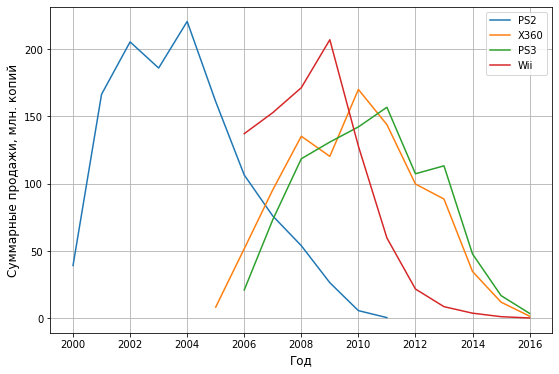

In [35]:
# Для оценки продаж игр по годам построим графики суммарных продаж по регионам 
# за каждый год для ТОП-4 платформ

plt.figure(figsize=(9, 6))

for platf in platforms_sales.head(4).index:
    
    plt.plot(data.query('platform == @platf').pivot_table(index = ['year_of_release'],
                                                          values = ['sales_sum'],
                                                          aggfunc = 'sum'), label= platf)
plt.xlabel('Год', fontsize=12)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

Из построенных графиков видно, что цикл существованя приставки составляет около 10 лет, после чего они почти теряют популярность, вырабатывают свой ресурс, и появляются их сменщики. При этом пик продаж игр приходится примерно на 5-6 год существования платформы. С учетом того, что популярность PS2, Wii, X360, PS3 уже прошли, а на сцену вышли их сменщики - PS4 и XBox One, то актуальным периодом будем считать время с момента их выхода (2013 год) и по настоящее время.

## Получение среза за актуальный период

Для получения рамок актуального периода нужно определить, какие платформы в данный момент являются действующими и когда они появились. Википедия дает информацию, что новые версии наиболее популярных систем PS и XBOX вышли в 2013 году. Это ознаменовало "новую эру" в игростроении, так как теперь равнение у всех игроделов будет именно на этих мастодонтов. Значит, актуальный период начинается именно в это время, так как предыдущие приставки теперь будут показывать только регресс по продажам, что хорошо видно по построенным ранее графикам.

In [36]:
# Сделаем срез по данным актуального периода 
# и сохраним их в новый датафрейм, который и будем использовать впредь

data_actual = data.query('year_of_release >= 2013')

In [37]:
# Посмотрим результат

data_actual.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
33,33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,0.0,0.0,NaN,14.60
42,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


## Изучение результатов продаж игр в актуальный период по платформам

In [38]:
# Получаем сводную таблицу с данными о глобальных продажах игр по платформам в актуальных период

platforms_actual  = (data_actual.pivot_table(index = ['platform'],
                                                values = ['sales_sum'], 
                                                aggfunc = 'sum')).sort_values(by = 'sales_sum', 
                                                                              ascending = False)

In [39]:
# Посмотрим результат

platforms_actual.head(10)

,sales_sum
platform,
PS4,314.14
PS3,181.43
XOne,159.32
3DS,143.25
X360,136.80
WiiU,64.63
PC,39.43
PSV,32.99
Wii,13.66


Данные в таблице говорят сами за себя. В актуальный период вперед выходят новые платформы, в том числе PS4, XOne, Nintendo 3DS. Хотя PS3 все еще уждерживает неплохие позиции по суммарным продажам за эти годы. Для более детального мониторинга ситуации нужно построить графики продах по годам.

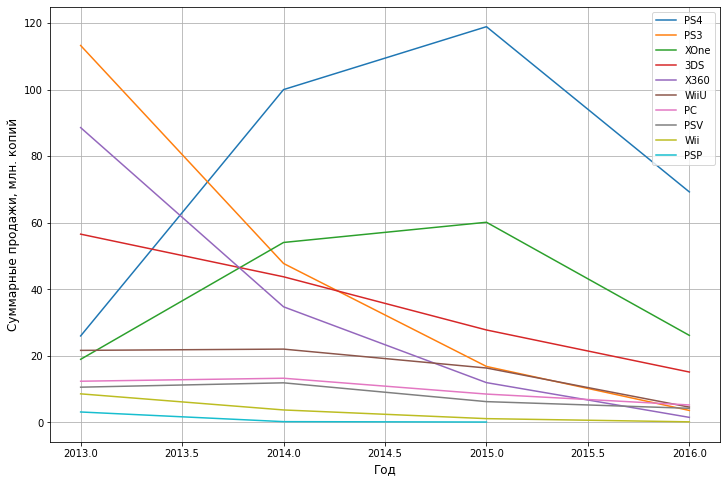

In [40]:
# Строим графики продаж игр по годам для ТОП-10 платформ

plt.figure(figsize=(12, 8))

for platf in platforms_actual.head(10).index:
    
    plt.plot(data_actual.query('platform == @platf').pivot_table(index = ['year_of_release'],
                                                                 values = ['sales_sum'],
                                                                 aggfunc = 'sum'), label= platf)

plt.xlabel('Год', fontsize=12)
plt.ylabel('Суммарные продажи, млн. копий', fontsize=12)
plt.legend(loc='best')
plt.grid()
plt.show()

По построенным графикам отчетливо видно, что все платформы, кроме PS4 и XOne показывают стабильность и уходят на покой. Четвертая "плойка" же и новый "коробокс" до 2015 года демонстрировали неплохой рост, а затем достаточно сильно просели. Думаю, что просадка может быть временным явлением, так как ресурс консолей еще не выработан, среднее время их существования ище не прошло. Таким образом, можно сделать вывод о перспективности только этих двух платформ.

## График «ящик с усами» по глобальным продажам игр в разбивке по платформам

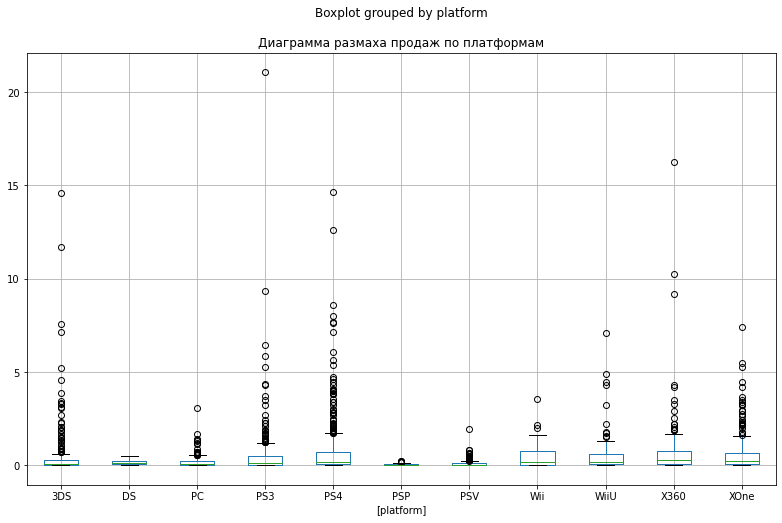

In [41]:
# Построим график "ящик с усами" по продажам, распределив данные по платформам

data_actual.boxplot(column=['sales_sum'] , by = ['platform'], figsize = (13,8)).set_title('Диаграмма размаха продаж по платформам')
plt.show()

In [42]:
# Посмотрим, что из себя представляет выброс по платформе PS3

data_actual[data_actual['sales_sum'] == data_actual['sales_sum'].max()]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
16,16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05


На представленном графике диаграм усов, который был построен по значениям глобальных продаж игр по каждой из приставок в актуальный период, заметно, что медианные значения для каждой платформы не сильно отличаются друг от друга. При этом отчетливо видно, что в статистике присутствует значительное количество выбросов, что говорит о неравномерности в популярности игр. К примеру, на графике для PS3 есть значение, превышающее 20 млн. копий. 

Проверка показывает, что это значение соответствует игре GTA 5, что вполне соответствует истине и не является ошибкой в данных. При этом PSP, PSV и DS показывают близкое к нормальному распределение без "отклонений", что может говорить об отсуствии ярко выраженных "бестселлеров" для этих платформ. Таким образом, "выбросы" на данных графиках демонстрируют игры, которые стали мегапопулярными и выбились из общей массы.

## Изучение влияния рейтинга на продажи игр для PS4

In [43]:
# Получим срез актуальных данных по популярной приставке PS4

data_actual_ps4 = data_actual.query('platform == "PS4"')

In [44]:
# Выводим результат

data_actual_ps4.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
31,31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,0.0,0.0,NaN,14.63
42,42,Grand Theft Auto V,PS4,2014.0,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,77,FIFA 16,PS4,2015.0,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,87,Star Wars Battlefront (2015),PS4,2015.0,Shooter,2.99,3.49,0.22,1.28,0.0,0.0,NaN,7.98
92,92,Call of Duty: Advanced Warfare,PS4,2014.0,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


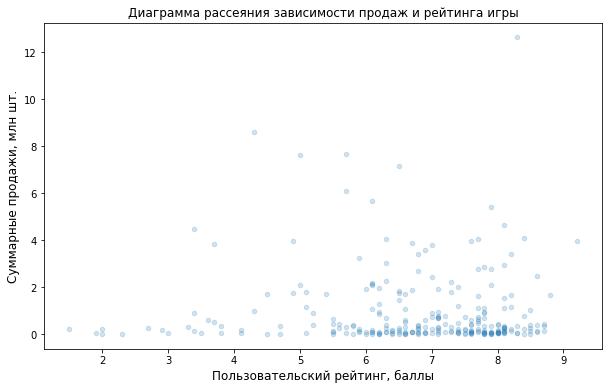

In [45]:
# Для визуализации зависимости между отзывами пользователей и глобальными продажами
# построим диаграмму рассеяния по соответствующим столбцам. При этом будем отсекать нулевые
# значения рейтинга

data_actual_ps4.query('user_score != 0').plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.2, figsize=(10,6)).set_title('Диаграмма рассеяния зависимости продаж и рейтинга игры')
plt.xlabel('Пользовательский рейтинг, баллы', fontsize=12)
plt.ylabel('Суммарные продажи, млн шт.', fontsize=12)
plt.show()

In [46]:
# Для тех же данных посчитаем коэффициент корреляции

data_actual_ps4.query('user_score != 0')['user_score'].corr(data_actual_ps4.query('user_score != 0')['sales_sum'])

-0.03195711020455643

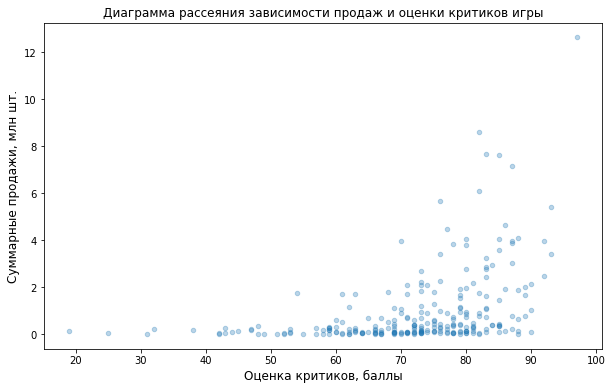

In [47]:
# Точно те же действия проделаем для столбца с оценками критиков

data_actual_ps4.query('critic_score != 0').plot(x='critic_score', y='sales_sum', kind='scatter',alpha=0.3, figsize=(10,6)).set_title('Диаграмма рассеяния зависимости продаж и оценки критиков игры')
plt.xlabel('Оценка критиков, баллы', fontsize=12)
plt.ylabel('Суммарные продажи, млн шт.', fontsize=12)
plt.show()

In [48]:
# И считаем коэффициент корреляции для столбцов critic_score и sales_sum

data_actual_ps4.query('critic_score != 0')['critic_score'].corr(data_actual_ps4.query('critic_score != 0')['sales_sum'])

0.4065679020617816

Складывается интересная картина. Диаграмма рассеяния для взаимозависимости оценок пользователей и продаж не показывает четкой структуры. Присутствует разброс и шатание, по которому нельзя выявить четкого тренда, а коэффициент корреляции вообще отрицательный, хоть и небольшой (-0.03). Это можно объяснить тем, что такие рейтинги часто накручивают, что меняет истинную картину, игроки не всегда могут объективно дать оценки. Это приводит к тому, что четкой зависимости здесь не проглядвается, если не отсекать по какому-либо критерию неправдоподобные баллы.
    
По отзывам критиков ситуация иная. Диаграмма рассеяния рисует нам более четкую картину увеличения количества продаж при росте оценки. Это подтверждает положительный коэффициент корреляции (0.4). 

Поэтому можно говорить о том, что чем выше оценка профессионалов, тем больше будет продаж, а еще о том, что чем лучше игра продается, тем она качественнее и интереснее, а, значит, отзывы критиков лучше.

## Сравнение выводов предыдущего пункта с продажами по "коробоксу"

In [49]:
# Получим срез актуальных данных по популярной приставке XOne

data_actual_xone = data_actual.query('platform == "XOne"')

In [50]:
# Выводим результат

data_actual_xone.head()

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sales_sum
99,99,Call of Duty: Black Ops 3,XOne,2015.0,Shooter,4.59,2.11,0.01,0.68,0.0,0.0,NaN,7.39
165,165,Grand Theft Auto V,XOne,2014.0,Action,2.81,2.19,0.00,0.47,97.0,7.9,M,5.47
179,179,Call of Duty: Advanced Warfare,XOne,2014.0,Shooter,3.22,1.55,0.01,0.48,81.0,5.4,M,5.26
242,242,Halo 5: Guardians,XOne,2015.0,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,270,Fallout 4,XOne,2015.0,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22


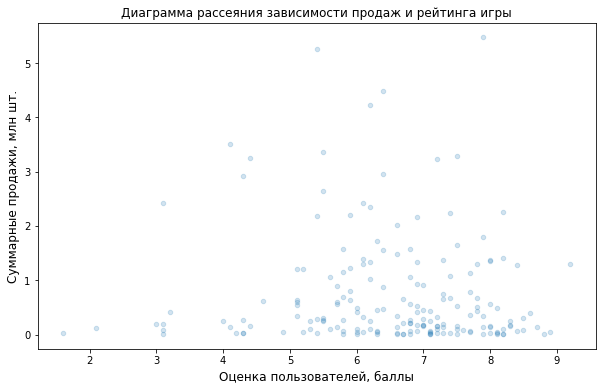

In [51]:
# Для визуализации зависимости между отзывами пользователей и глобальными продажами
# построим диаграмму рассеяния по соответствующим столбцам. 

data_actual_xone.query('user_score != 0').plot(x='user_score', y='sales_sum', kind='scatter', alpha=0.2, figsize=(10,6)).set_title('Диаграмма рассеяния зависимости продаж и рейтинга игры')
plt.xlabel('Оценка пользователей, баллы', fontsize=12)
plt.ylabel('Суммарные продажи, млн шт.', fontsize=12)
plt.show()

In [52]:
# Для тех же данных посчитаем коэффициент корреляции

data_actual_xone.query('user_score != 0')['user_score'].corr(data_actual_xone.query('user_score != 0')['sales_sum'])

-0.06892505328279416

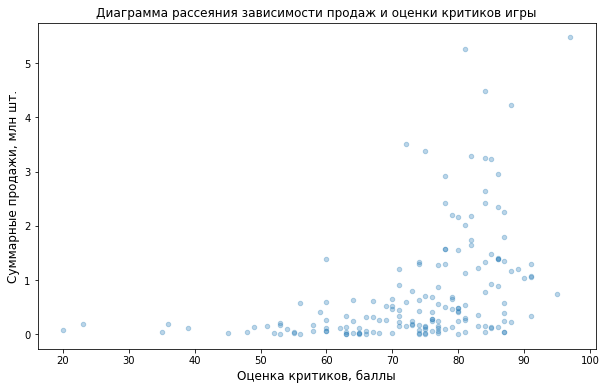

In [53]:
# Точно те же действия проделаем для столбца с оценками критиков

data_actual_xone.query('critic_score != 0').plot(x='critic_score', y='sales_sum', kind='scatter',alpha=0.3, figsize=(10,6)).set_title('Диаграмма рассеяния зависимости продаж и оценки критиков игры')
plt.xlabel('Оценка критиков, баллы', fontsize=12)
plt.ylabel('Суммарные продажи, млн шт.', fontsize=12)
plt.show() 

In [54]:
# И считаем коэффициент корреляции для столбцов critic_score и sales_sum

data_actual_xone.query('critic_score != 0')['critic_score'].corr(data_actual_xone.query('critic_score != 0')['sales_sum'])

0.4169983280084017

Данные по "коробоксу" практически полностью повторяют исследование по "плойке". Коэффициенты корреляции близки к показателям по PS4. Таким образом, можно сделать предположение об общем тренде для всех консолей.

## Анализ зависимости популярности игр от жанра

In [55]:
# С помощью сводной таблицы посчитаем суммарное количество продаж по жанрам игры

data_actual.pivot_table(index = ['genre'], values = ['sales_sum'], aggfunc = 'sum').sort_values(by = 'sales_sum', ascending = False)

,sales_sum
genre,
Action,321.87
Shooter,232.98
Sports,150.65
Role-Playing,145.89
Misc,62.82
Platform,42.63
Racing,39.89
Fighting,35.31
Adventure,23.64


Из полученного столбца явно видно, что самым популярным жанром в актуальный период являются Action-игры. Они занимают первое место с достаточно большим отрывом (321.87 млн. проданных копий против 232.98 млн. у жанра Shooter). 

C остальными же играми даже и сравнивать не приходится, так как в более-менее приемлемых рамках держатся жанры Sports (150.65 млн. копий) и Role-Playing (145.89 млн. копий), а дальше идет резкое падение показателей.
    
Есть и антипод жанра Action - игры формата Puzzle (3.17 млн. копий). Логика нынче не в почете у игроков. А самое обидное - показатели жанра Strategy (10.08 млн. копий, большая часть из них, наверное, один только StarCraft дает). А ведь это отличный жанр!

## Выводы по разделу

- В данной части работы были определены лучшие платформы по продажам за все годы (PS2, X360, PS3, Wii  на вершине ТОПа). 
    
- Получено представление о развитии игровой индустрии за все годы, в результате чего выяснено, что массовые производство и продажа игр стали активно развиваться в 1994 году. 
- Оценен срок популярности игровой приставки, который составляет в среднем 10 лет, сделано предположение о том, что актуальный периодом для изучения и построения прогнозов по его показателем начинается в 2013 году. Дальнейшая часть работы строится исключительно на показателях с этого года.
- Построены графики развития уровня продаж по платформам за актуальный период. Выяснено, что перспективными приставками являются PS4 и XOne
- Построены "ящики с усами" по продажам на каждой платформе. Из их анализа сделан вывод, что выбросами в данной информации являются бестселлеры по продажам. Например, для PS3 - GTA V
- Проанализирована зависимость уровня продаж на PS4 b XOne от оценок критиков и пользователей, посчитаны коэффициенты корреляции (-0.03 для оценок пользователей и 0.41 для рецензий критиков для PS4 и -0.06 для оценок пользователей и 0.42 для рецензий критиков для XOne) и построены диаграммы рассеяния. Расчет показал, что зависимость продаж от отзывов игроков по расчетам является отрицательной, но здесь стоит брать поправку на необъективность данных, что делает эти данные нежелательными для анализа без их дополнительной обработки. Для зависимости же продаж от рейтинга критиков все четко и ясно, она является прямой.
- Изучены продажи игр по жанрам. Больше всего на сегодняшний день играют в Action-игры, на втором месте Shooter-ы. Хуже всего продаются жанры Puzzle и Strategy.

# Составление портрета пользователя каждого региона

## Определение приоритетов по платформам

In [56]:
# С помощью сводной таблицы подсчитаем продажи игр в Северной Америке по платформам

data_actual.pivot_table(index = ['platform'],
                        values = ['na_sales',],
                        aggfunc = 'sum').sort_values(by = ['na_sales'], ascending = False).head()

,na_sales
platform,
PS4,108.74
XOne,93.12
X360,81.66
PS3,63.50
3DS,38.20


In [57]:
# С помощью сводной таблицы подсчитаем продажи игр в Евросоюзе по платформам

data_actual.pivot_table(index = ['platform'],
                        values = ['eu_sales'],
                        aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
platform,
PS4,141.09
PS3,67.81
XOne,51.59
X360,42.52
3DS,30.96


In [58]:
# С помощью сводной таблицы подсчитаем продажи игр в Японии по платформам

data_actual.pivot_table(index = ['platform'],
                        values = ['jp_sales'],
                        aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
platform,
3DS,67.81
PS3,23.35
PSV,18.59
PS4,15.96
WiiU,10.88


Самой популярной приставкой в СА и ЕС оказалась PS4. Далее с разной степенью успешности в этих регионах идут PS3, XOne и X360. И только пятое место занимает портативная приставка Nintendo 3DS. Это говорит о том, что американцы и европейцы предпочитают проводить время за игрой дома, за большим экраном, а не в дороге или под одеялом с портативной консолью.
    
Ситуация в Японии выглядит иначе. Первое место по продажам там держит Nintendo 3DS для портативной игры. И только затем идет PS3. Затем снова портативная консоль - PSV, а потом снова стационарная PS4. А пятое место занимает незатронутая в ТОП-5 предыдущих регионов WiiU. Это значит, что японцы любят играть на ходу или в любом удобном для них месте.

## Определение приоритетов по жанрам

In [59]:
# С помощью сводной таблицы подсчитаем продажи игр в Северной Америке по жанрам

data_actual.pivot_table(index = ['genre'],
                        values = ['na_sales'],
                        aggfunc = 'sum').sort_values(by = 'na_sales',
                                                     ascending = False).head()

,na_sales
genre,
Action,126.05
Shooter,109.74
Sports,65.27
Role-Playing,46.40
Misc,27.49


In [60]:
# С помощью сводной таблицы подсчитаем продажи игр в ЕС по жанрам

data_actual.pivot_table(index = ['genre'], 
                        values = ['eu_sales'], 
                        aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
genre,
Action,118.13
Shooter,87.86
Sports,60.52
Role-Playing,36.97
Racing,20.19


In [61]:
# С помощью сводной таблицы подсчитаем продажи игр в Японии по жанрам

data_actual.pivot_table(index = ['genre'],
                        values = ['jp_sales'],
                        aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
genre,
Role-Playing,51.04
Action,40.49
Misc,9.20
Fighting,7.65
Shooter,6.61


И снова очень интересная ситуация, но теперь с жанрами. СА и ЕС снова выступают почти одинаково. У них на первом месте Action, потом по порядку Shooter, Sports и Role-Playing. И только пятая позиция отличается - Misc для СА и Racing для Евросоюза.
    
Япония же все переиначивает. Более всего в этой стране играют в Role-Playing, на втором месте Action, потом Misc, незатронутый ранее Fighting (ну еще бы, родина каратэ, дзю-до и многих других видов боевых активностей), и в конце ТОП-5 располагается жанр Shooter.

## Влияние рейтинга ESRB на продажи в отдельном регионе

In [62]:
# Сформируем сводную таблицу суммарных продаж игр в СА в привязке к рейтингу ESRB

data_actual.pivot_table(index = ['rating'],
                        values = ['na_sales'],
                        aggfunc = 'sum').sort_values(by = 'na_sales', ascending = False).head()

,na_sales
rating,
M,165.21
E,79.05
E10+,54.24
T,49.79


In [63]:
# # Сформируем сводную таблицу суммарных продаж игр в ЕС в привязке к рейтингу ESRB

data_actual.pivot_table(index = ['rating'],
                        values = ['eu_sales'],
                        aggfunc = 'sum').sort_values(by = 'eu_sales', ascending = False).head()

,eu_sales
rating,
M,145.32
E,83.36
E10+,42.69
T,41.95


In [64]:
# То же самое для Японии

data_actual.pivot_table(index = ['rating'],
                        values = ['jp_sales'],
                        aggfunc = 'sum').sort_values(by = 'jp_sales', ascending = False).head()

,jp_sales
rating,
T,20.59
E,15.14
M,14.11
E10+,5.89


Тщательное и скурпулезное исследование (ага) показало, что страны Северной Америки являются побратимами Евросоюза в приложении к рейтингу ESRB.

Так, распределение продаж по данному рейтингу имеет совершенно одинаковый вид по позициям, отличается только в цифрах. Видно, что в данных регионах более всего ценятся игры с рейтингом М - для взрослых. Затем те, которые подходят всем - рейтинг Е, далее идут те, кому исполнилось 10 лет - Е10+, и подростки от 13 до 19 лет - рейтинг Т. 
    
Япония же снова показала свой независимый взгляд на вещи. По данной стране больше всего покупок в жанре Т, затем Е, потом М и в конце Е10+. 

## Вывод по разделу

В текущем разделе были определены приоритеты пользователей разных регионов по платформам, жанрам и рейтингу ESRB. Результаты показали, что игроки в Северной Америке и в Евросоюзе мыслят почти во всем одинаково. Самой популярной приставкой там является PS4, любимым жанром Action, а наиболее востребованные игры относятся к рейтигну М. 
    
Япония же идет своим путем. Там в ходу портативные консоли, самая популярная - Nintendo 3DS, играют более всего в ролевые игры, а самый востребованный рейтинг - T.

# Проверка статистических гипотез

In [65]:
# Не отходя от принятых норм, установим уровень статистической значисости в уровень 0.05

alpha = 0.05

## Гипотеза о равенстве средних пользовательских рейтингов XBoxOne и PC

<AxesSubplot:>

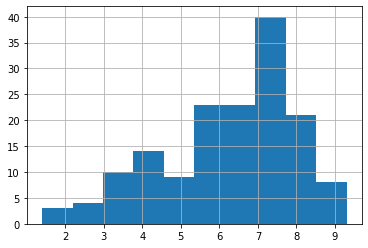

In [66]:
# Построим распределение рейтинга для PC

data_actual.query('user_score != 0 and platform == "PC"')['user_score'].hist()

<AxesSubplot:>

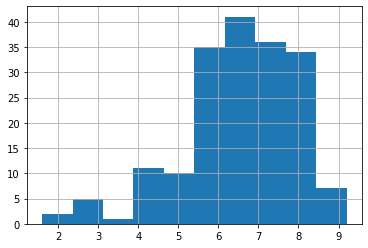

In [67]:
# Построим распределение рейтинга для XboxOne

data_actual.query('user_score != 0 and platform == "XOne"')['user_score'].hist()

In [68]:
# Перед проверкой гипотез оценим схожесть распределений наших данных с помощью критерия Колмогорова-Смирнова. 
# Данный тест ставит нулевую гипотезу о равенстве двух распределений.
# Выберем статистическую значимость P_value на уровне 0,05

ks_2samp(data_actual.query('user_score != 0 and platform == "PC"')['user_score'], data_actual.query('user_score != 0 and platform == "XOne"')['user_score'])

KstestResult(statistic=0.13431407302375045, pvalue=0.0867147328620369)

pvalue=0.0867 - выше установленного нами значения. Значит, мы не можем отвергнуть гипотезу о схожести распределений выборок.

In [69]:
# В качестве нулевой гипотезы H0 утверждаем, что средние пользовательские рейтинги 
# платформ Xbox One и PC равны. Тогда в качестве альтернативы H1 говорим обратное,
# что эти показатели разные. При этом отсекаем нулевые показания по столбцу user_score

results = st.ttest_ind(data_actual.query('user_score != 0 and platform == "PC"')['user_score'], data_actual.query('user_score != 0 and platform == "XOne"')['user_score'])

if results.pvalue < alpha:
    print('P-value = {}. Уровень статистической значимости не достигнут. Есть повод отвергнуть H_0'.format(results.pvalue))
else:
    print('P-value = {}. Уровень статистической значимости выше установленного порога. Не удалось отвергнуть H_0'.format(results.pvalue))

P-value = 0.14012658403611647. Уровень статистической значимости выше установленного порога. Не удалось отвергнуть H_0


Не удалось отвергнуть нулевую гипотезу. Это говорит о том, что вероятность неравенства средних значений пользовательских рейтингов XBox One и PC крайне мала.

## Гипотеза о неравенстве средних пользовательских рейтингов жанров Action и Sports

In [70]:
# В качестве нулевой гипотезы H0 выбираем такую, что средние пользовательские рейтинги жанров Action и Sports равны. 
# В качестве альтернативной H1 выступит гипотеза об их неравенстве

results = st.ttest_ind(data_actual.query('genre == "Action"')['user_score'], data_actual.query('genre == "Sports"')['user_score'])

if results.pvalue < alpha:
    print('P-value = {}. Уровень статистической значимости не достигнут. Есть повод отвергнуть H_0'.format(results.pvalue))
else:
    print('P-value = {}. Уровень статистической значимости выше установленного порога. Не удалось отвергнуть H_0'.format(results.pvalue))

P-value = 0.0907420711340326. Уровень статистической значимости выше установленного порога. Не удалось отвергнуть H_0


Расчет показал, что ситуация с равенством средних пользовательских рейтингов жанров Action и Sports более вероятна, чем их неравенство.

## Вывод по разделу

На данном этапе была произведена проверка статистических гипотез. По ее результатам можно делать предположение о равенстве средних пользовательских рейтингов XBox One и PC и равенстве средних пользовательских рейтингов жанров Action и Sports.

# Общий вывод по проекту

В ходе данного проекта отработаны все этапы анализа данных:

- осуществлена загрузка датасета, его осмотр, даны комментарии по составу;
- произведена обработка данных, заполнены пропуски, отформатированы названия столбцов, создан новый столбец на основе имеющихся;
- проведено исследование показателей продаж для каждой платформы. Выявлены самые популярные за все времена (PS2, X360, PS3, Wii). Оценен срок популярности игровой приставки (10 лет), определе актуальный период для изучения (с 2013 г.);
- определены перспективные консоли - PS4 и Xbox One;
- построены "ящики с усами" по продажам на каждой платформе. Из их анализа сделан вывод, что выбросами в данной информации являются бестселлеры по продажам. Например, для PS3 - GTA V
- с помощью диаграмм рассеяния и коэффициентов корреляции показано, что зависимость продаж от отзывов игроков не является объективным фактором, здесь требуются более сложные методы для выяснения зависимостей Для влияния же рейтина критиков на продажи проще - оно прямое.
- изучены продажи игр по жанрам. Больше всего на сегодняшний день играют в Action-игры, на втором месте Shooter-ы. Хуже всего продаются жанры Puzzle и Strategy.
- определены приоритеты пользователей разных регионов по платформам, жанрам и рейтингу ESRB. В Северной Америке и в Евросоюзе самой популярной приставкой является PS4, любимым жанром Action, а наиболее востребованные игры относятся к рейтигну М. В Японии в ходу портативные консоли, самая популярная - Nintendo 3DS, играют более всего в ролевые игры, а самый востребованный рейтинг - T.
- проверка гипотез показала, что средние пользовательские рейтинги XBox One и PC равны, как и пользовательские рейтинги жанров Action и Sports.
    
Таким образом, при принятии решения об организации рекламы, о количестве закупок в магазин тех или иных игр или приставок можно использовать полученные данные. 
    
Из показанного выше следует, что для Северной Америки и Евросоюза подойдут одни и те же мерки в большей части случаев. Поэтому для них нужно больше внимания уделять приставкам PS4 и Xbox One, играм жанра Action возрастной категории M. Для определения перспективности продаж той или иной игры обращать внимание на отзывы критиков, а не на рейтинг игроков. К тому же, организовывать рекламу лучше через критиков, а не через накрутки рейтингов пользователей. 

Для Японии же все по-другому. Если работать по меркам СА и ЕС, то можно и разориться. Здесь нужно больше внимания уделять портативным консолям, играм жанра РГП для возрастов категории Т. При этом отзывы критиков так же важны, как и ранее, здесь разночтений нет.
